In [1]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SessionSmith import ssm

from sklearn.model_selection import train_test_split

## Session管理, 初期化 (SessionSmith==2.0.0)

In [2]:
ssm.init()

✓ SSM already initialized in /Users/yutotakagi/Develop/ass-production-management2/notebook


In [3]:
df = pd.read_excel('../data/raw/kadai.xlsx')
df.head(2)

,process_end_time,final_mes_time,OV,X1,X2,X3,X4,X5,X6,X7,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83
0,2016-08-14 23:07:00,2016-09-24 04:22:00,111.2886,22.98,1.37,797.2,0.67,0.15,0.08,67.15,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04
1,2016-08-14 23:07:00,2016-09-24 10:12:00,201.5617,22.45,9.40,803.8,0.68,0.15,0.08,56.11,...,0.1,0.04,6.4,0.58,0.0,4.1,0.0,0.01,0.16,0.04


In [4]:
df.shape

(2276, 86)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   process_end_time  2276 non-null   datetime64[ns]
 1   final_mes_time    2276 non-null   datetime64[ns]
 2   OV                2276 non-null   float64       
 3   X1                2276 non-null   float64       
 4   X2                2276 non-null   float64       
 5   X3                2276 non-null   float64       
 6   X4                2276 non-null   float64       
 7   X5                2276 non-null   float64       
 8   X6                2276 non-null   float64       
 9   X7                2276 non-null   float64       
 10  X8                2276 non-null   float64       
 11  X9                2276 non-null   float64       
 12  X10               2276 non-null   float64       
 13  X11               2276 non-null   float64       
 14  X12               2276 n

## 欠損値の確認

> 全列で欠損がないことを確認できた

In [6]:
df.isnull().sum().sort_values(ascending=False)

process_end_time    0
X52                 0
X60                 0
X59                 0
X58                 0
                   ..
X25                 0
X24                 0
X23                 0
X22                 0
X83                 0
Length: 86, dtype: int64

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
process_end_time,2276,2016-10-21 22:05:36.485061376,2016-08-14 23:07:00,2016-09-21 04:18:00,2016-10-11 20:55:00,2016-11-25 11:00:00,2016-12-24 20:05:00,NaN
final_mes_time,2276,2016-12-05 08:54:23.936731136,2016-09-24 04:22:00,2016-11-06 09:25:15,2016-11-26 16:26:00,2017-01-10 18:44:30,2017-01-30 10:15:00,NaN
OV,2276.0,128.035745,25.71875,80.438945,112.3856,168.245275,418.4056,62.160991
X1,2276.0,23.15442,20.02,21.96,23.12,24.35,27.49,1.670395
X2,2276.0,19.159508,0.88,1.37,3.04,14.4,158.62,34.826167
...,...,...,...,...,...,...,...,...
X79,2276.0,12.465373,0.29,3.3,4.1,7.1,470.0,58.885091
X80,2276.0,0.011538,0.0,0.0,0.01,0.01,0.6,0.041829
X81,2276.0,0.040663,0.0,0.0,0.01,0.04,0.36,0.08378
X82,2276.0,0.827851,0.07,0.16,0.21,0.33,16.0,2.87221


In [8]:
#データをdat1にコピーする
#"process_end_time"と"final_mes_time"を時系列オブジェクトに変換する
df["process_end_time"] = pd.to_datetime(df["process_end_time"])
df["final_mes_time"] = pd.to_datetime(df["final_mes_time"])

#最後の500レコードをテストデータとする
learn = df[0:1776]
test = df[1776:2276]

#インデックスをリセットする
learn = learn.reset_index(drop=True)
test = test.reset_index(drop=True)

#テストデータの最初の1レコードの"process_end_time"より前のlearnデータを取り出す
learn = learn[learn["final_mes_time"] < test['process_end_time'][0]]

In [9]:
learn.to_csv('../data/processed/learn.csv', index=False)
test.to_csv('../data/processed/test.csv', index=False)

## 訓練データとテストデータを区分して保存

In [10]:
learn_y = learn['OV']
learn.drop(columns=['OV'], inplace=True)
learn_X = learn

test_y = test['OV']
test.drop(columns=['OV'], inplace=True)
test_X = test

learn_X.to_csv('../data/interim/learn_X.csv', index=False)
learn_y.to_csv('../data/interim/learn_y.csv', index=False)
test_X.to_csv('../data/interim/test_X.csv', index=False)
test_y.to_csv('../data/interim/test_y.csv', index=False)

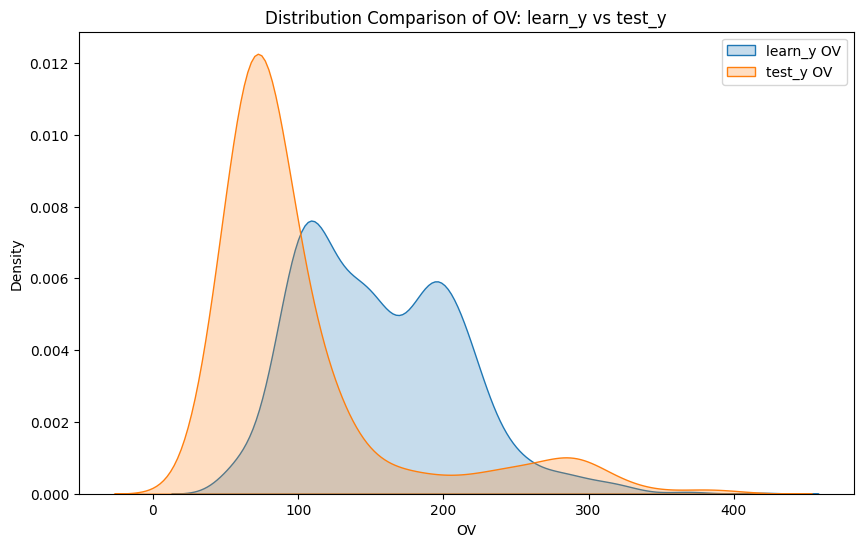

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(learn_y, label='learn_y OV', fill=True)
sns.kdeplot(test_y, label='test_y OV', fill=True)
plt.xlabel('OV')
plt.ylabel('Density')
plt.title('Distribution Comparison of OV: learn_y vs test_y')
plt.legend()
plt.show()

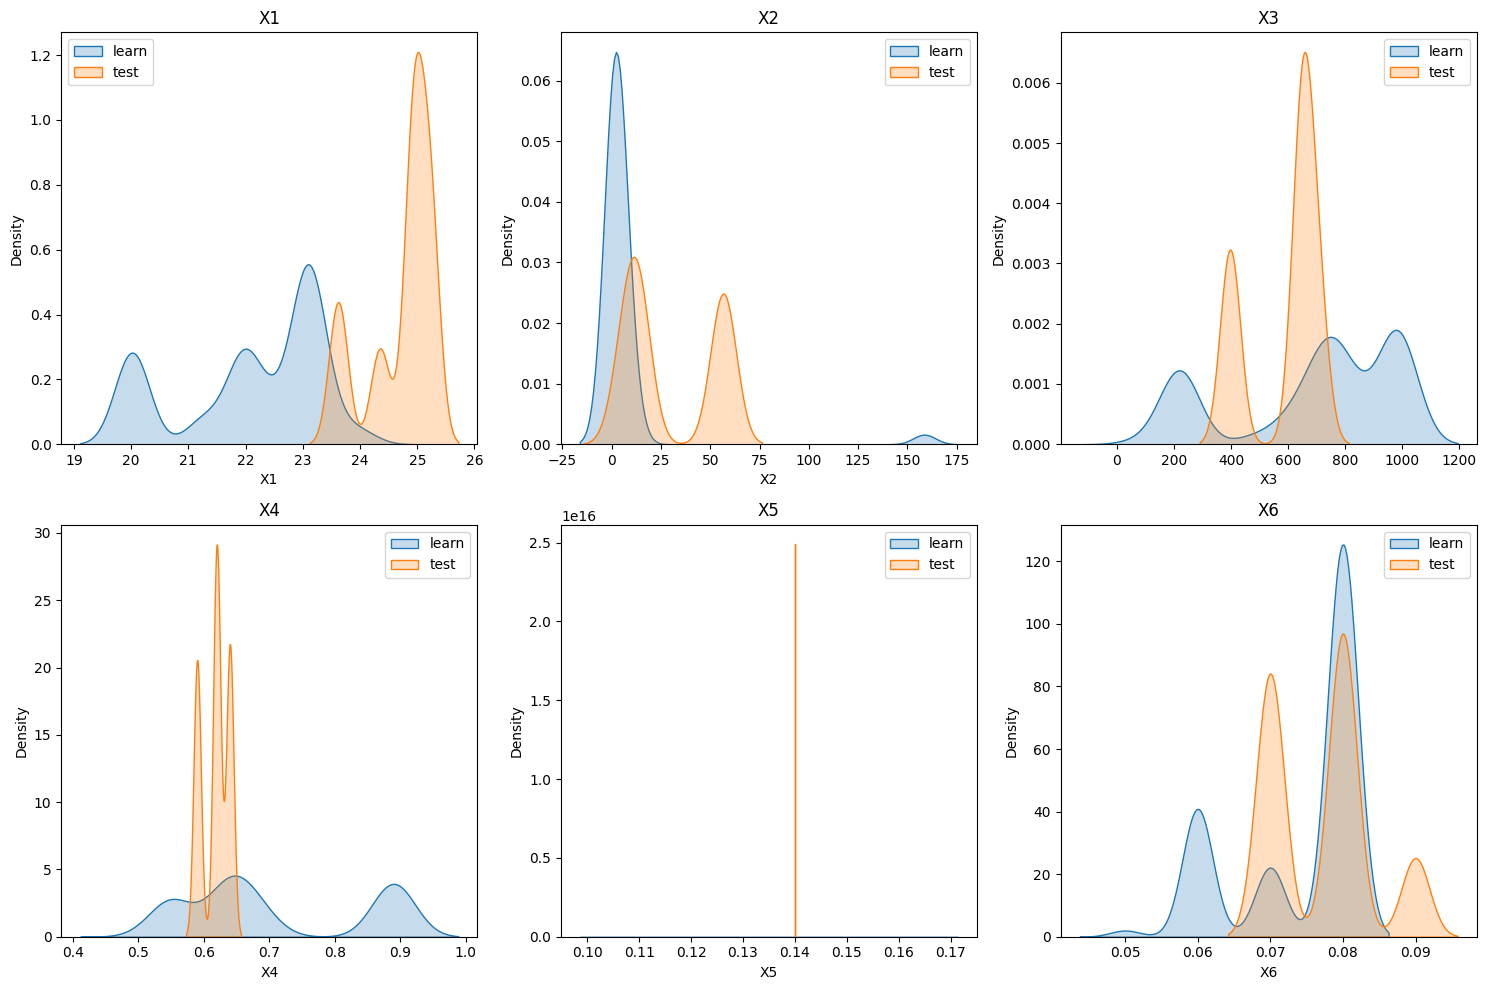

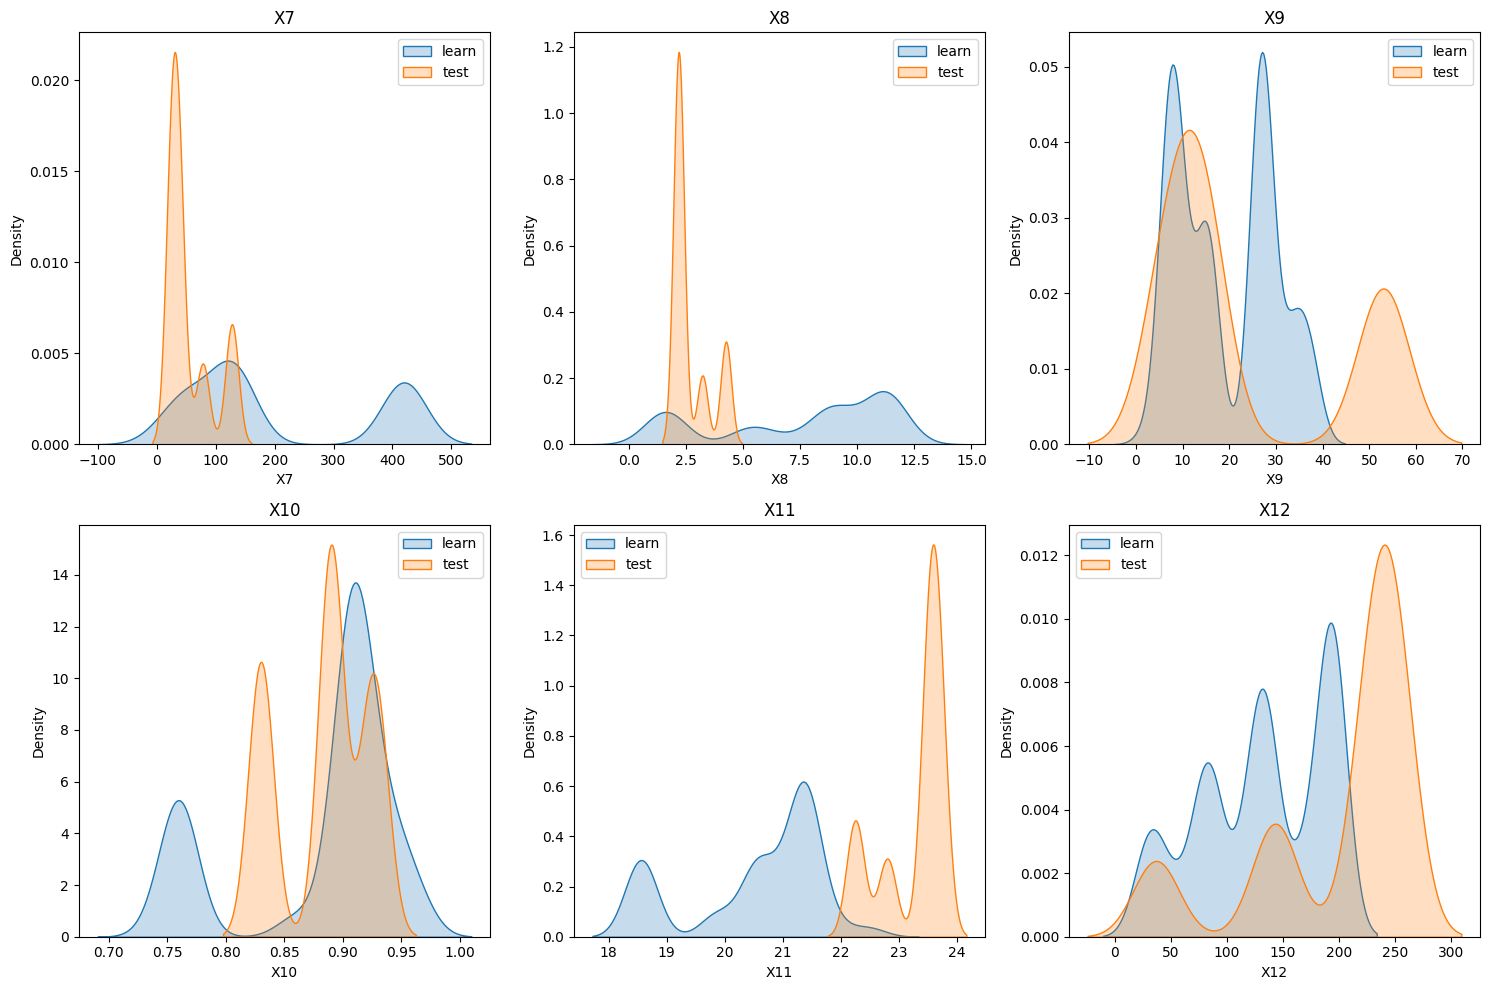

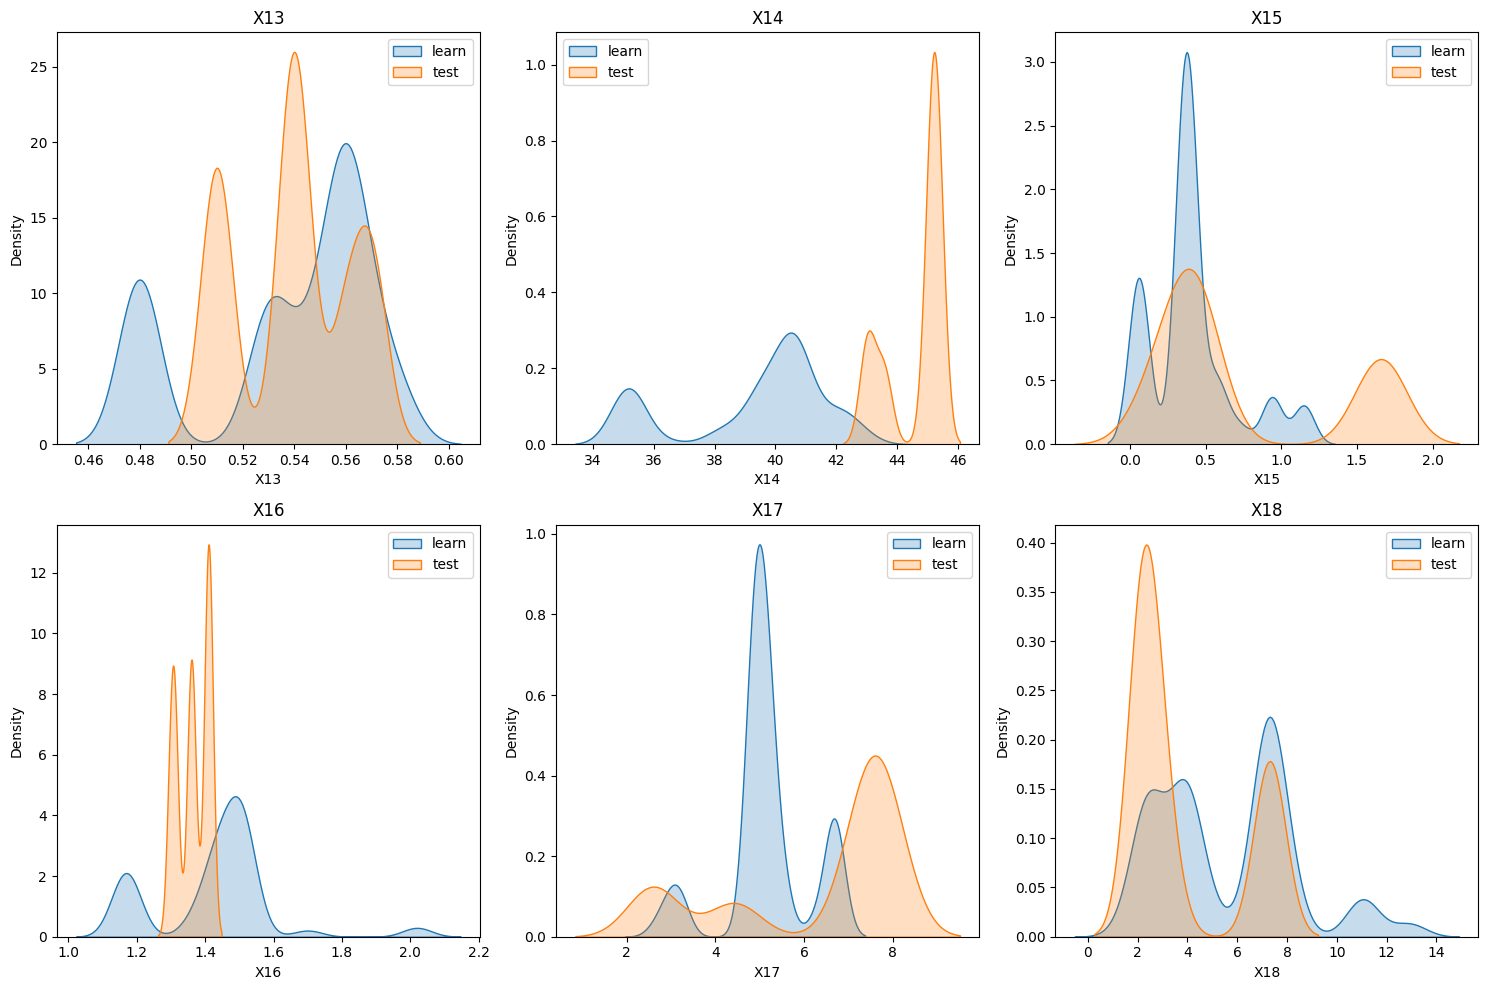

/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_56115/1550687777.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(learn[col], label='learn', fill=True)
/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_56115/1550687777.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(test[col], label='test', fill=True)
/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_56115/1550687777.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


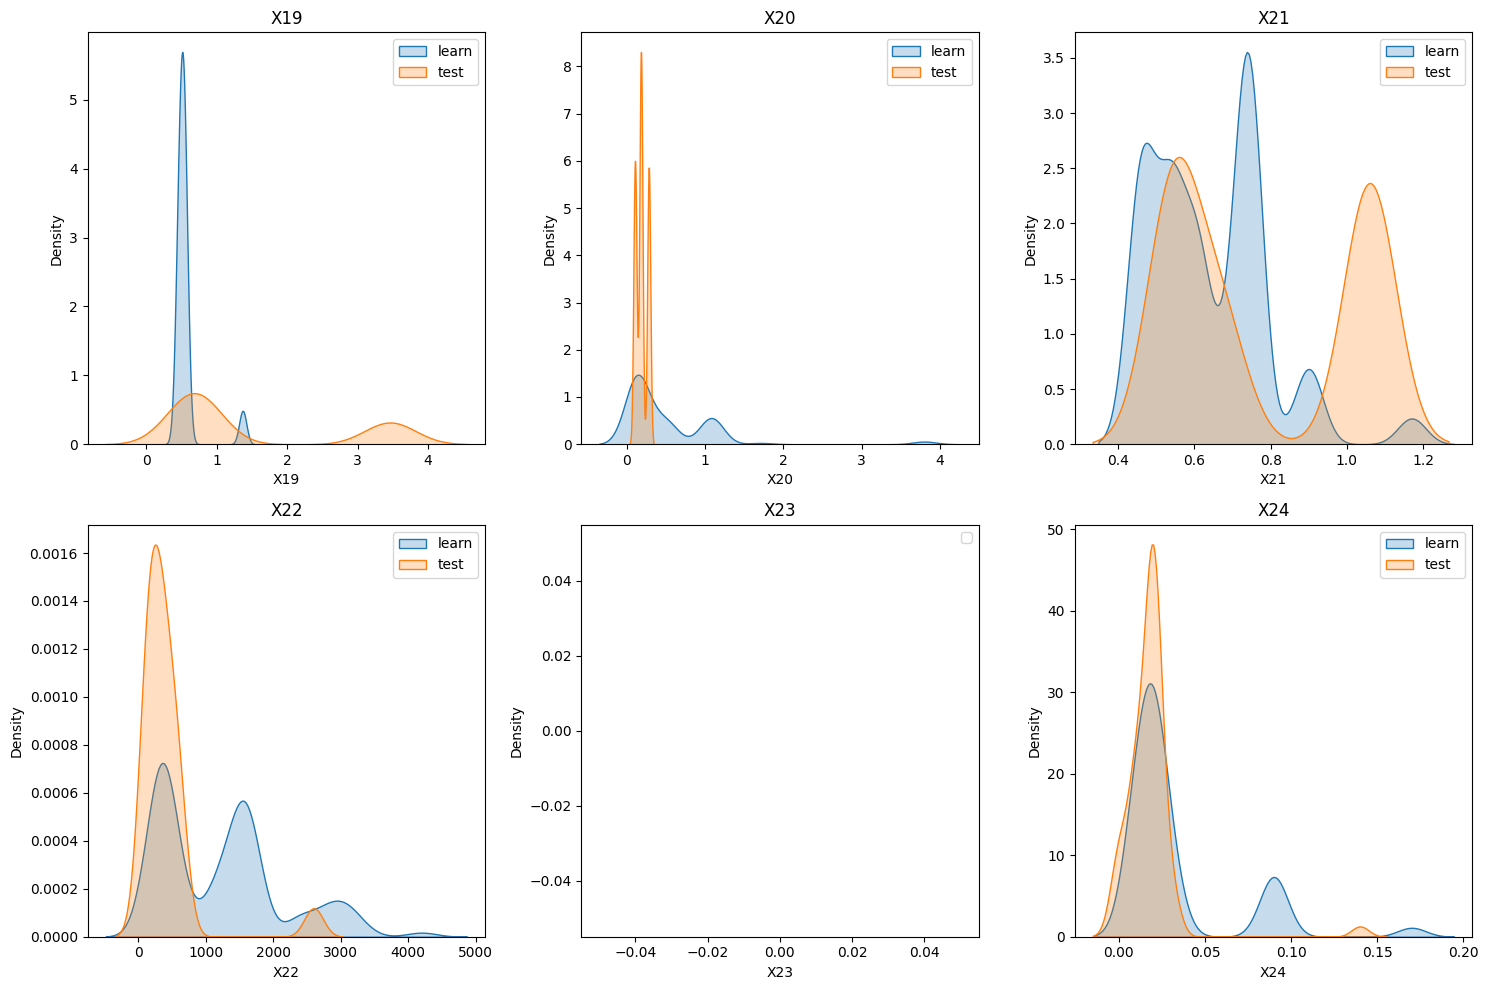

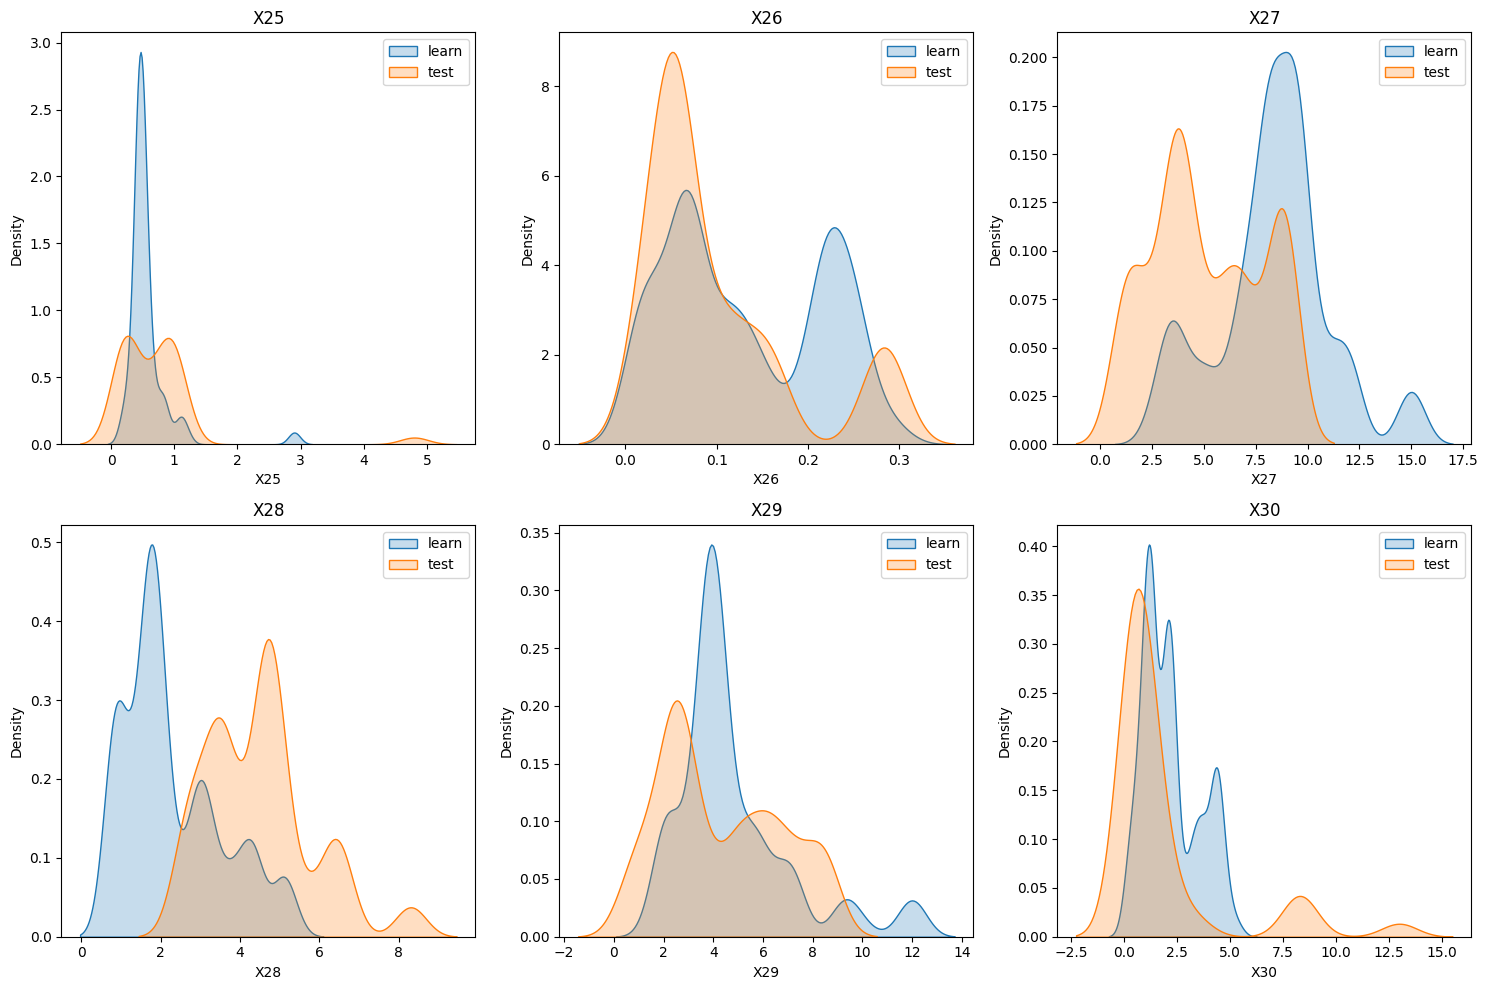

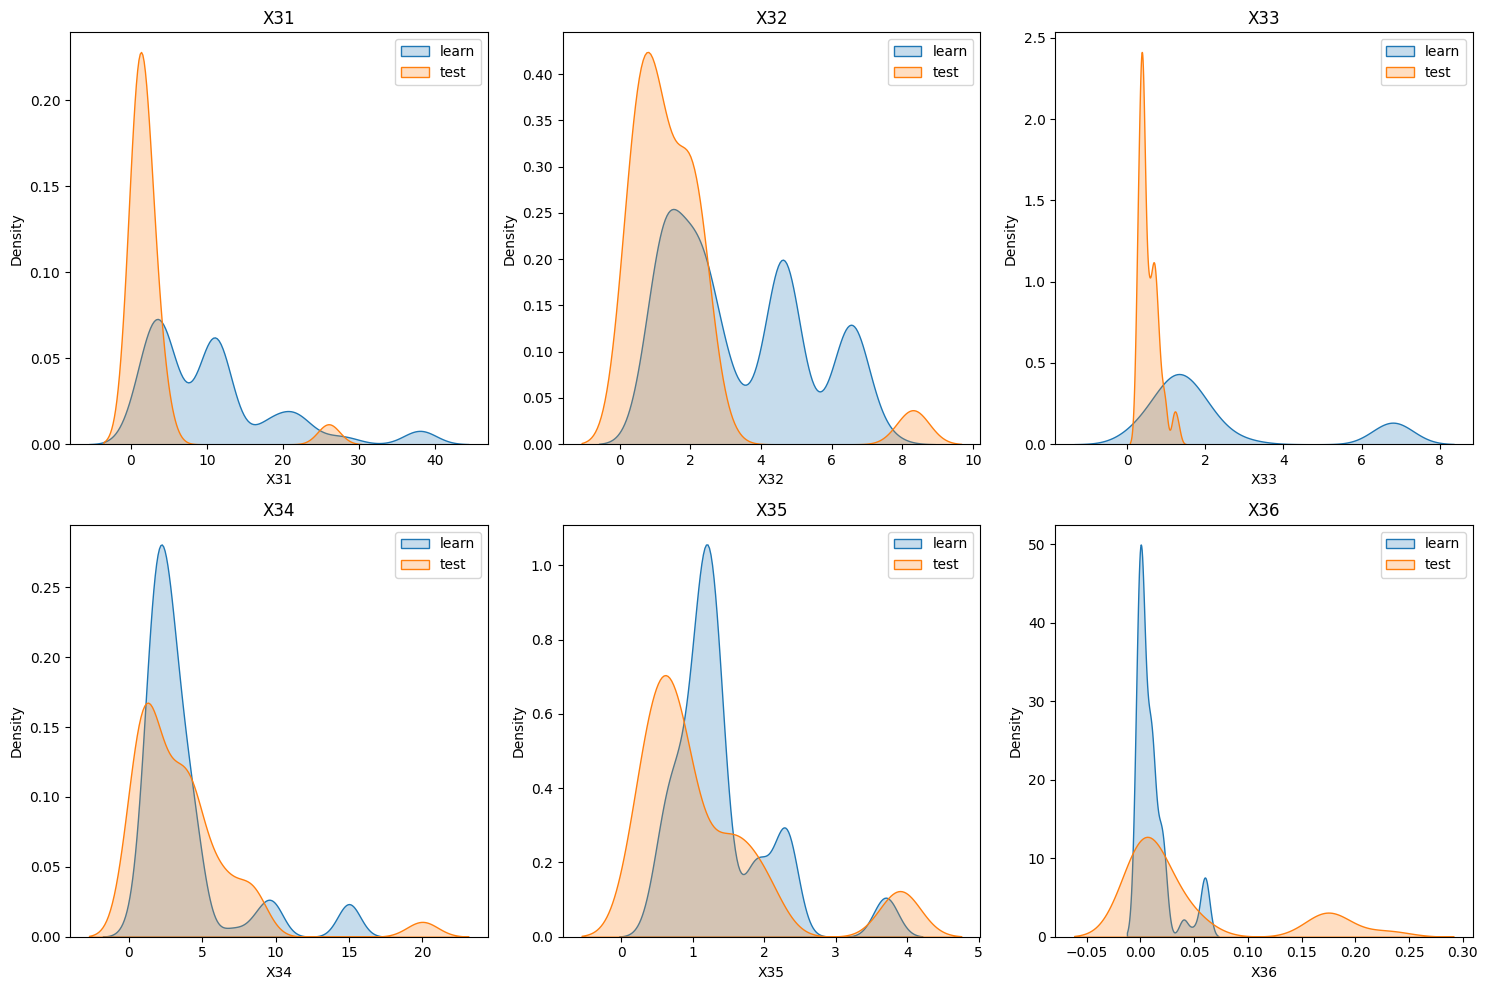

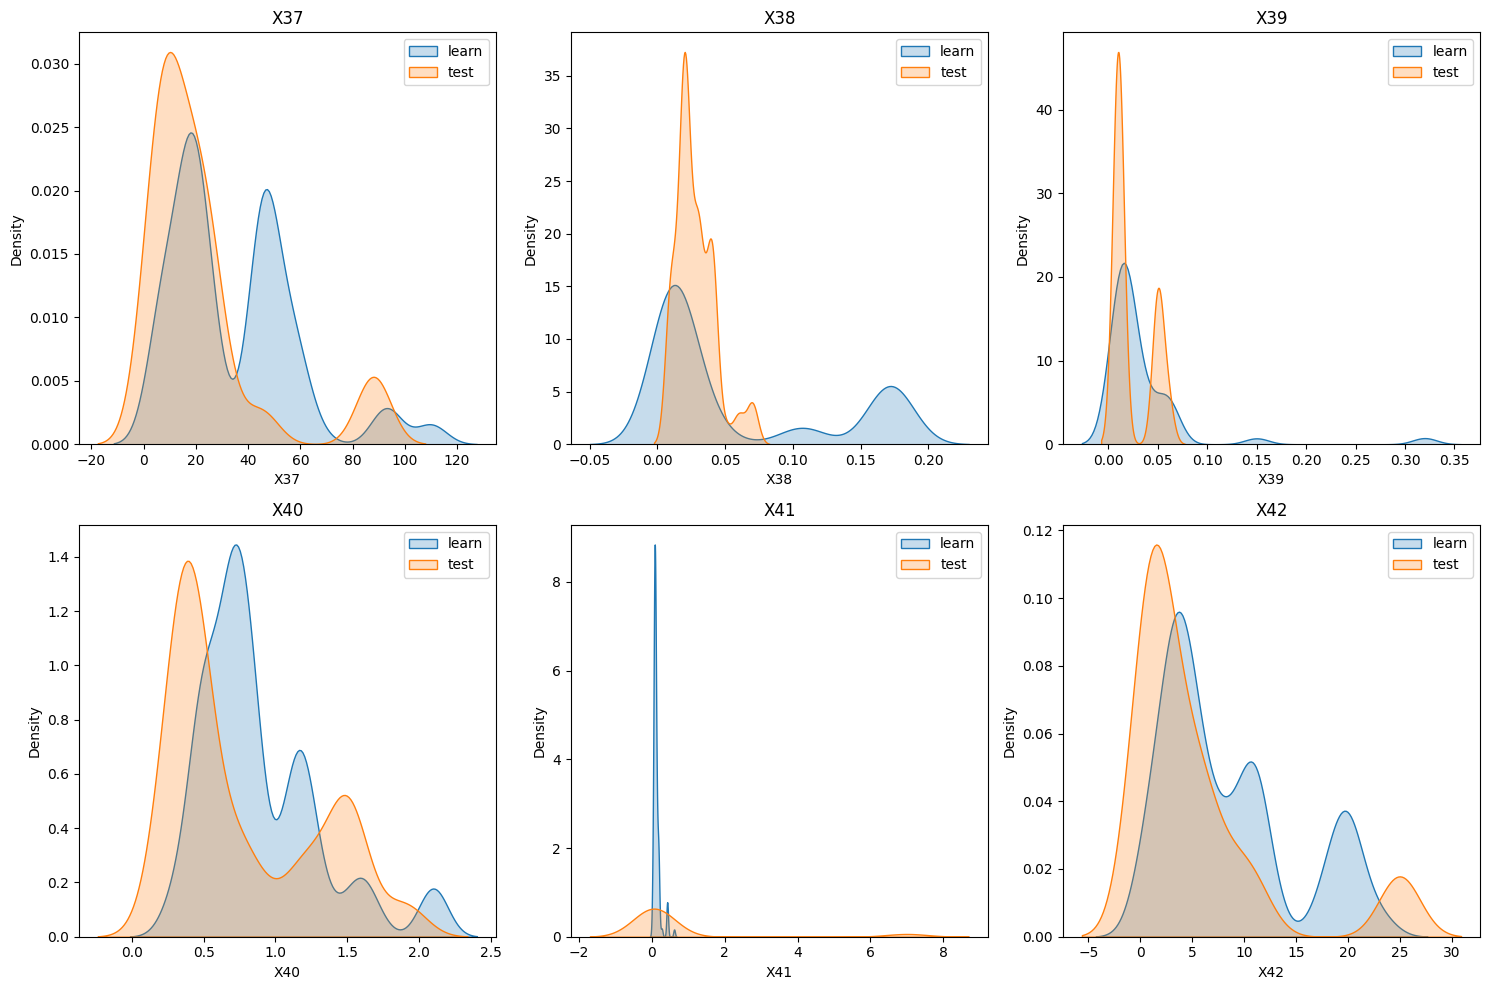

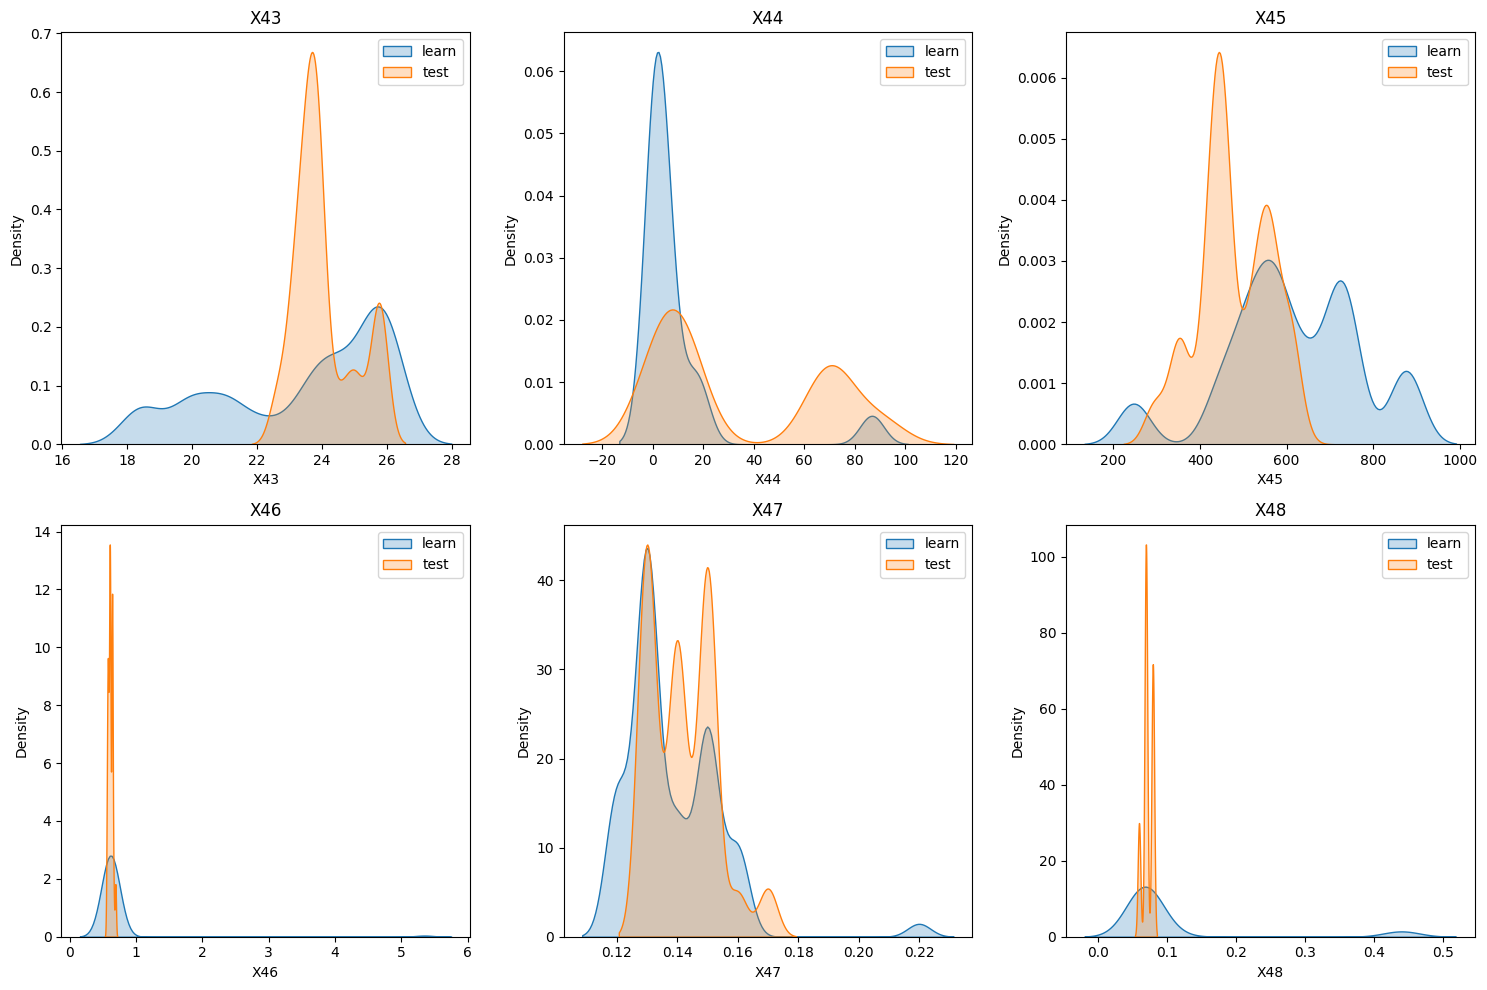

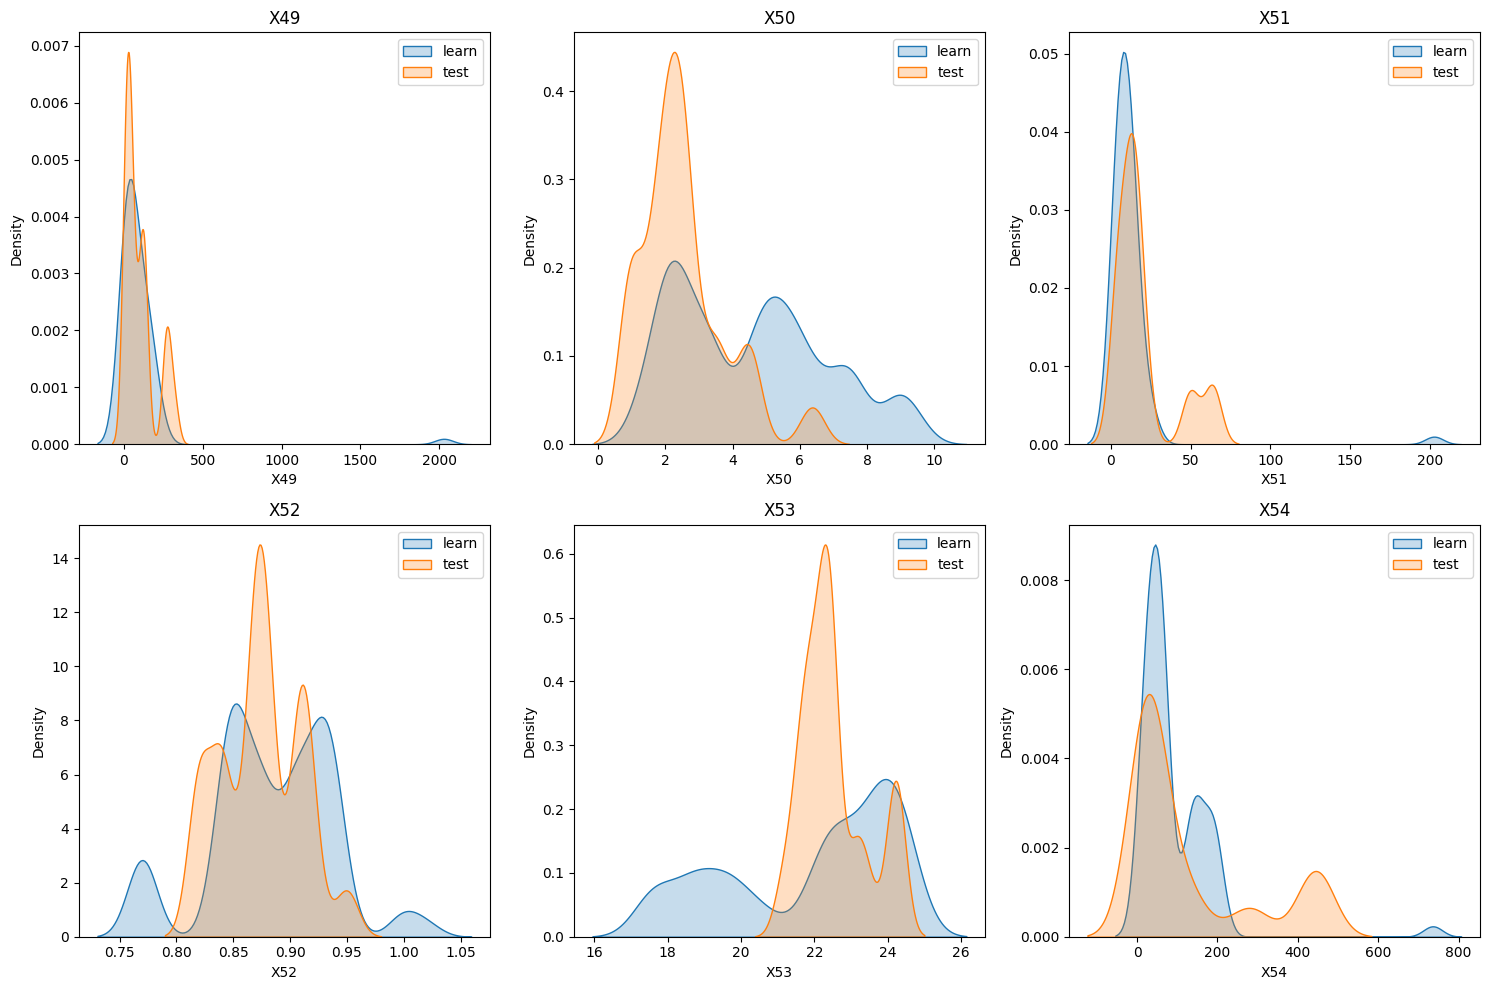

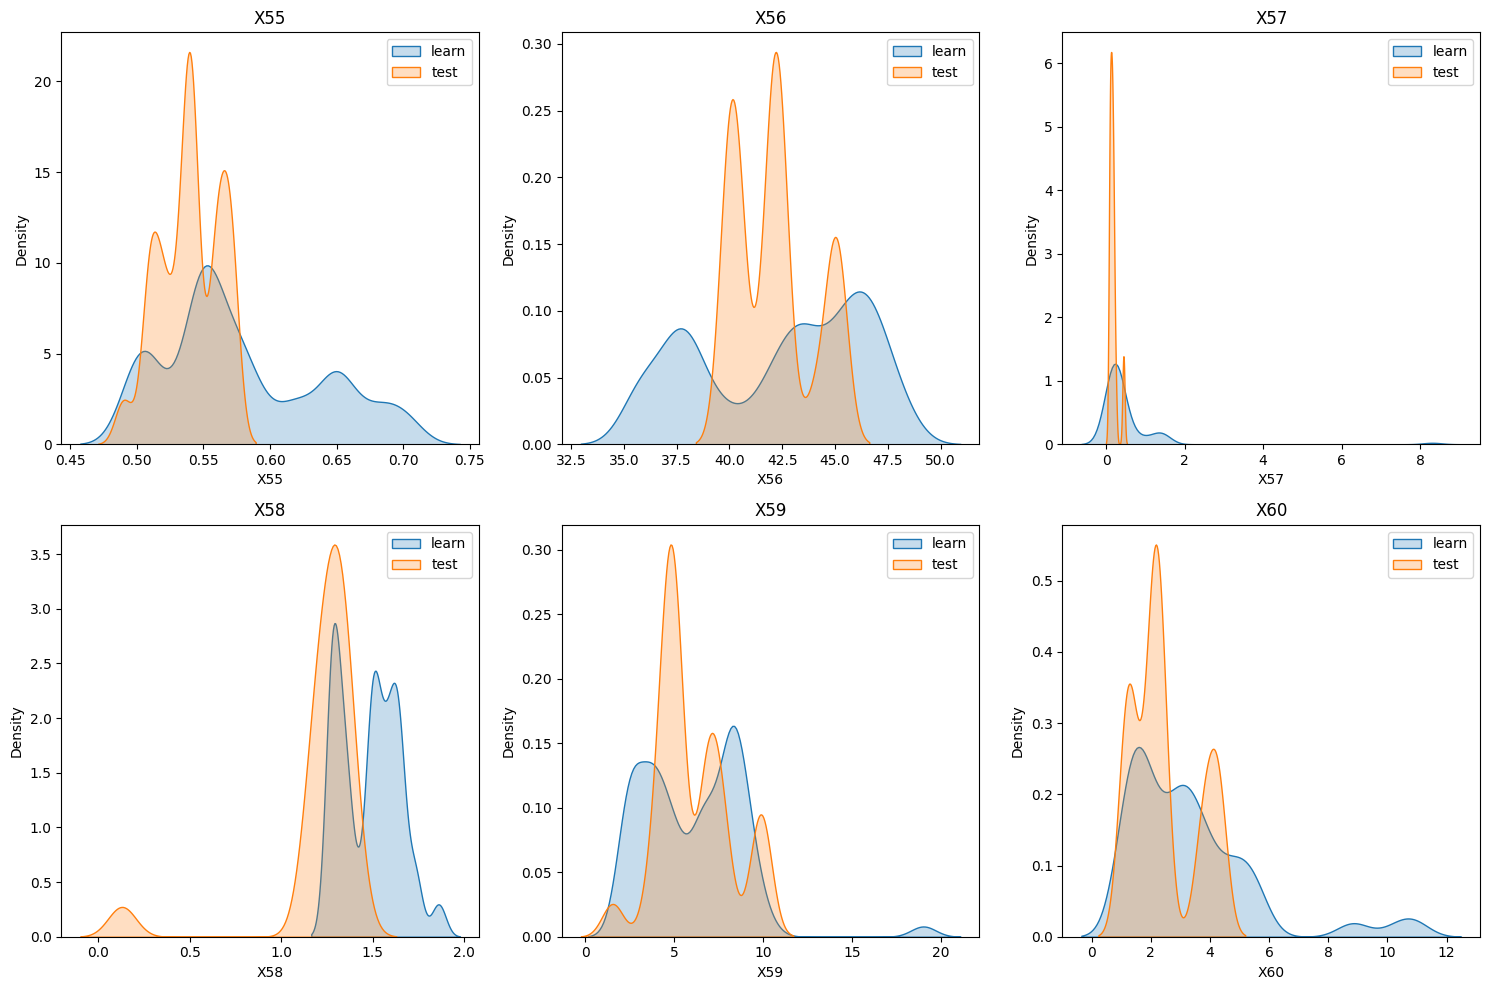

In [ ]:
for i in range(10):
    cols_to_plot = [f"X{i *6 + j}" for j in range(1,7)] 
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(2, 3, i)
        sns.kdeplot(learn[col], label='learn', fill=True)
        sns.kdeplot(test[col], label='test', fill=True)
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()


## データの期間を確認

process_end_time min: 2016-08-14 23:07:00
process_end_time max: 2016-12-24 20:05:00
訓練データ末尾: 2016-10-14
テストデータ開始: 2016-11-28


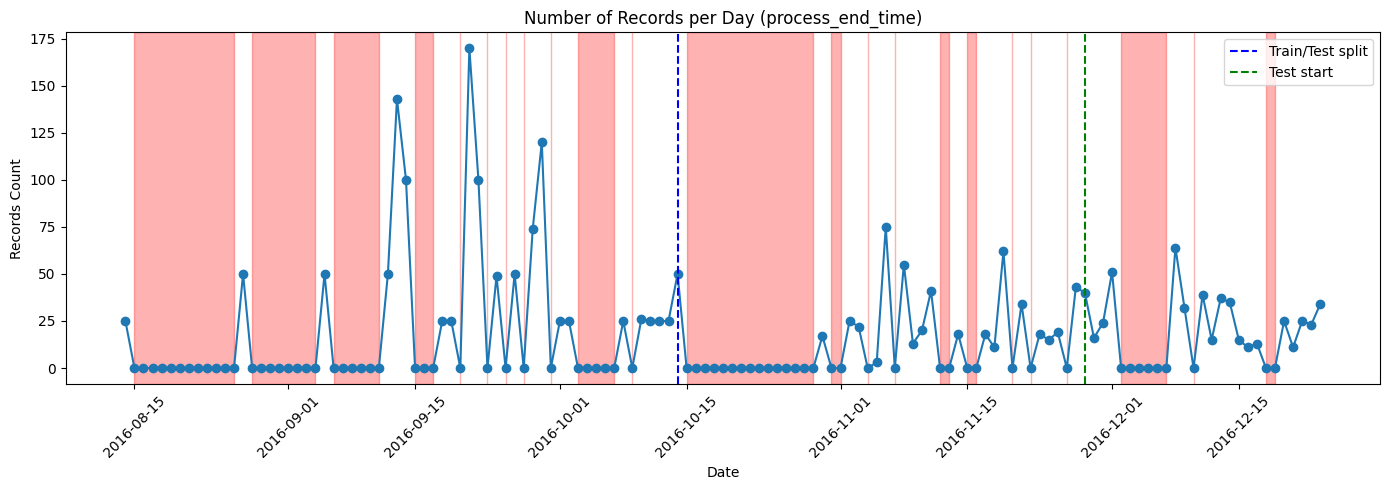

In [17]:
# process_end_time の日付の最小・最大を表示
print("process_end_time min:", df['process_end_time'].min())
print("process_end_time max:", df['process_end_time'].max())

# 日付ごとにカウント
date_counts = df['process_end_time'].dt.date.value_counts().sort_index()

# すべての日付の連続したindexを作成（記録の無い日付も含む）
full_dates = pd.date_range(start=df['process_end_time'].dt.date.min(), end=df['process_end_time'].dt.date.max(), freq='D')
full_date_series = pd.Series(index=full_dates, dtype=int)
full_date_series.update(date_counts)
full_date_series = full_date_series.fillna(0)

plt.figure(figsize=(14,5))
plt.plot(full_date_series.index, full_date_series.values, marker='o')

# 訓練とテストデータの分かれ目の線を入れる
# 学習・テストの最初と最後の日付（process_end_timeから取得）
learn_last_date = learn['process_end_time'].dt.date.max()
test_first_date = test['process_end_time'].dt.date.min()

print(f"訓練データ末尾: {learn_last_date}")
print(f"テストデータ開始: {test_first_date}")

plt.axvline(learn_last_date, color='blue', linestyle='--', label='Train/Test split')
plt.axvline(test_first_date, color='green', linestyle='--', label='Test start')

# 記録が一度も無い期間を色付け
zero_periods = (full_date_series == 0)
if zero_periods.any():
    in_gap = False
    gap_start = None
    for idx, is_zero in enumerate(zero_periods):
        if is_zero and not in_gap:
            gap_start = full_date_series.index[idx]
            in_gap = True
        if not is_zero and in_gap:
            gap_end = full_date_series.index[idx-1]
            plt.axvspan(gap_start, gap_end, color='red', alpha=0.3)
            in_gap = False
    if in_gap:
        gap_end = full_date_series.index[-1]
        plt.axvspan(gap_start, gap_end, color='red', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Records Count')
plt.title('Number of Records per Day (process_end_time)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../docs/output/学習データと訓練データのdatetime推移.png')
plt.show()


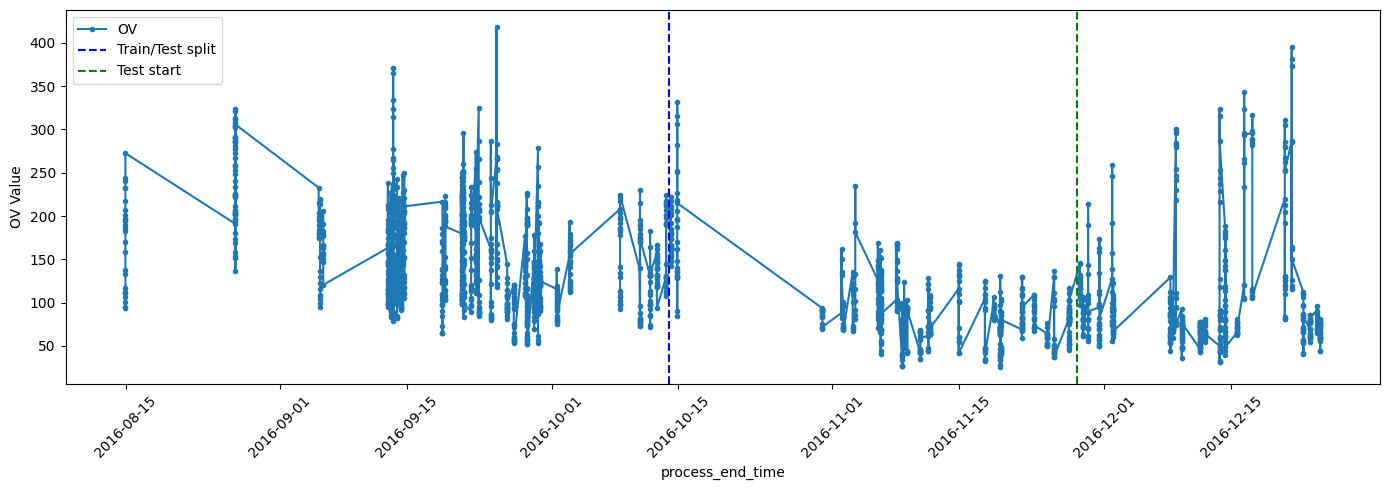

In [33]:
# OVの時系列推移をプロット

plt.figure(figsize=(14,5))
plt.plot(df['process_end_time'], df['OV'], marker='.', linestyle='-', label='OV')

plt.axvline(learn_last_date, color='blue', linestyle='--', label='Train/Test split')
plt.axvline(test_first_date, color='green', linestyle='--', label='Test start')

plt.xlabel('process_end_time')
plt.ylabel('OV Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../docs/output/OVの時系列推移.png')
plt.show()


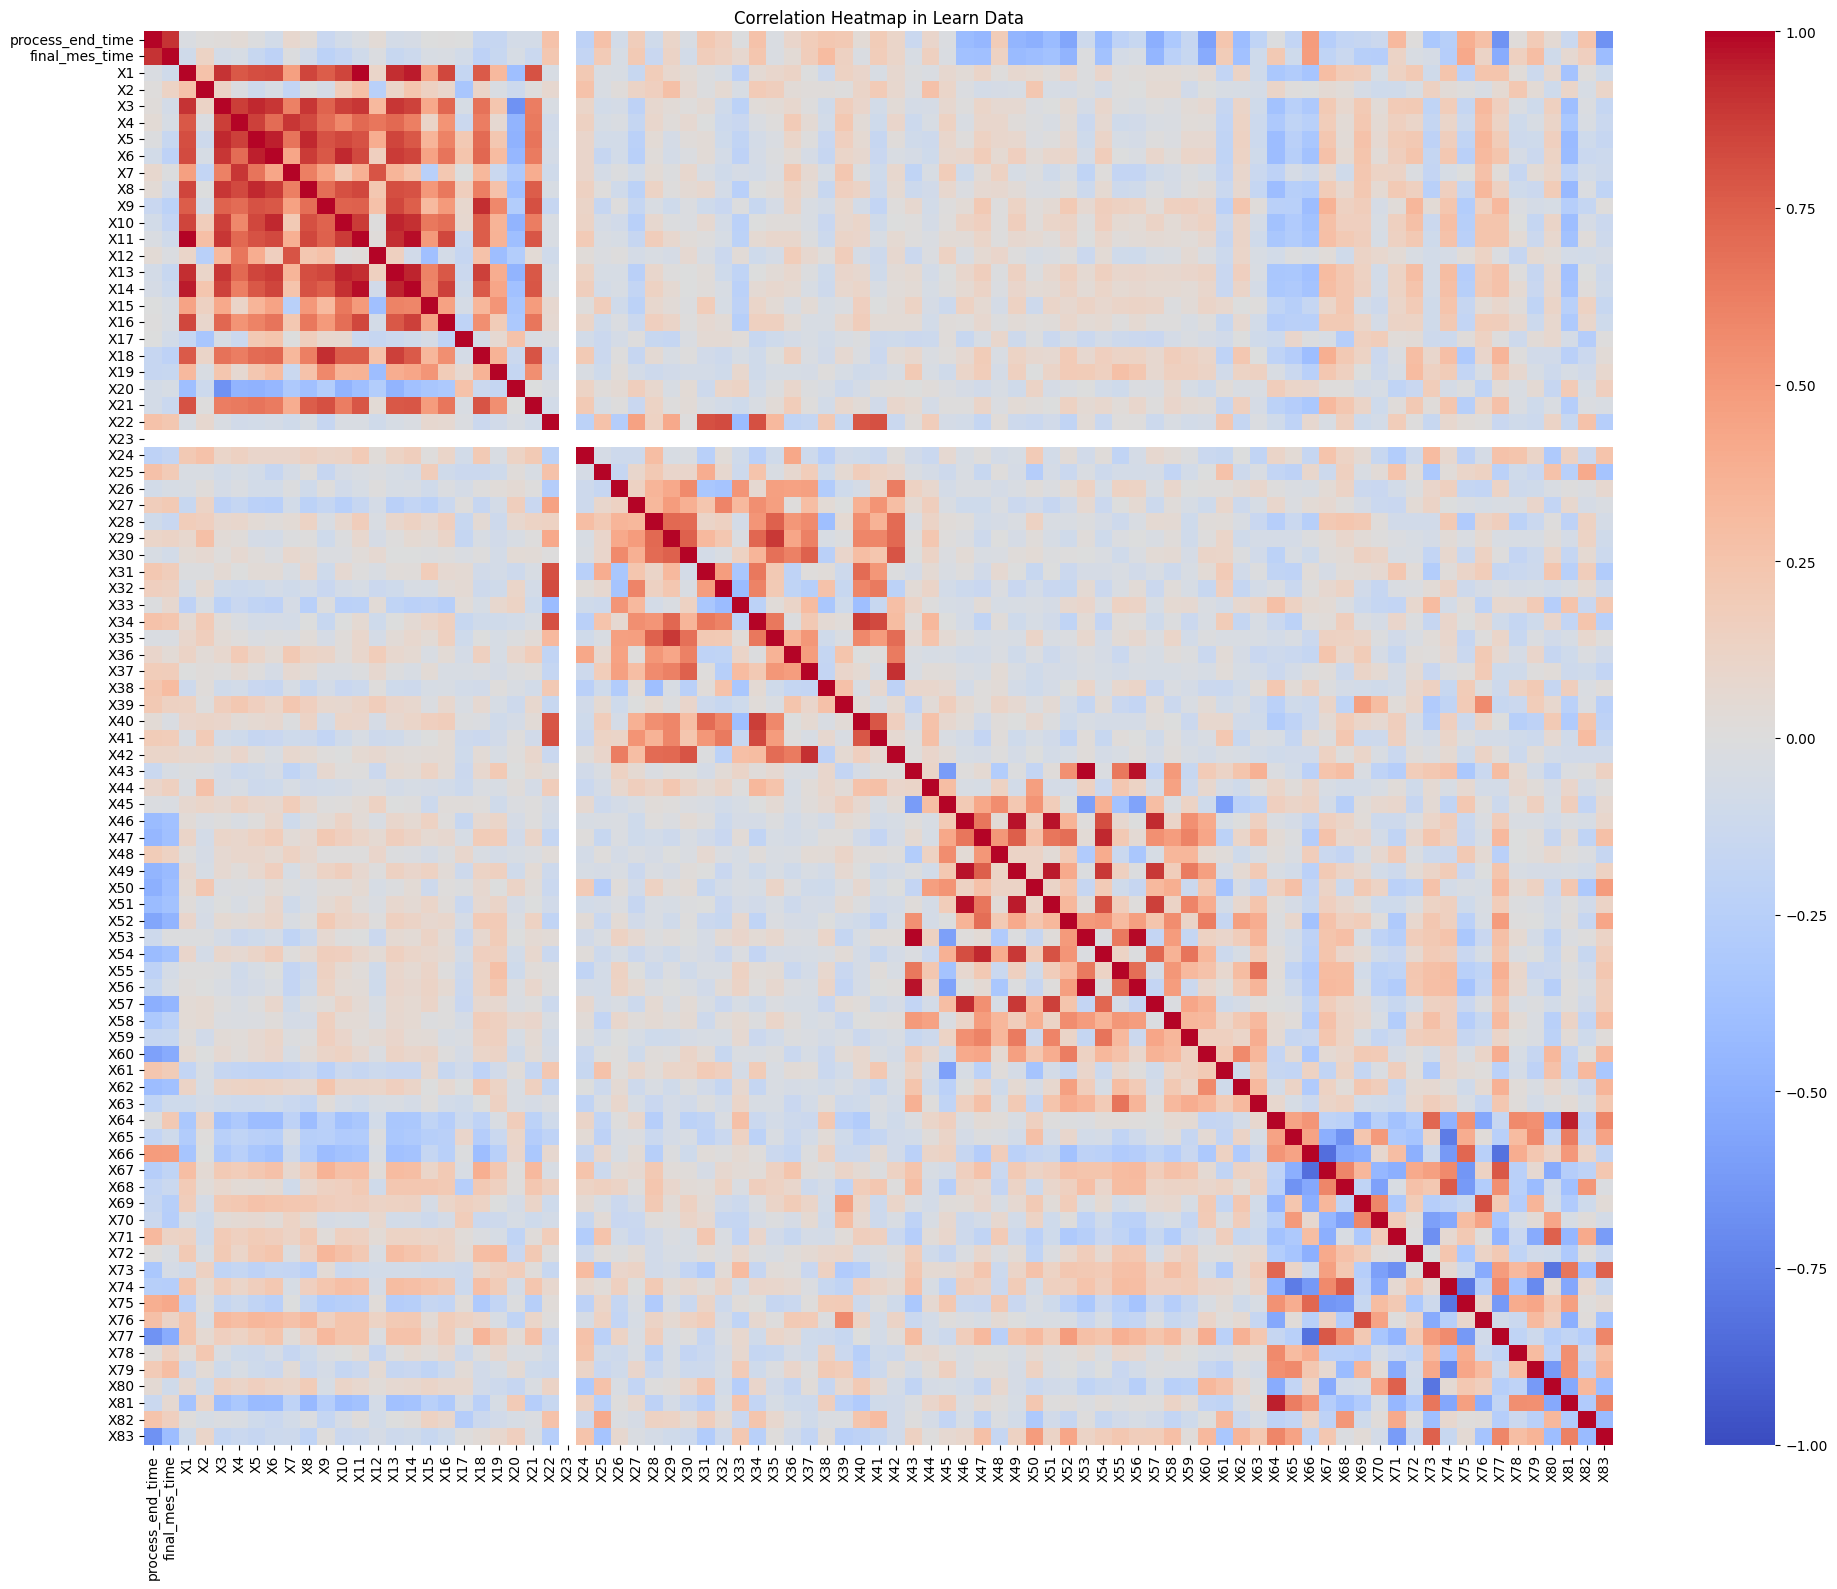

In [ ]:
# learnデータの相関行列を計算
corr = learn.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap in Learn Data')
plt.tight_layout()
plt.savefig('../docs/output/learn相関ヒートマップ.png')
plt.show()